# Introduction to Artificial Neural Networks with Keras

### The Perceptron

In [39]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris setosa?

In [3]:
iris['data'].shape

(150, 4)

In [4]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [5]:
y_pred = per_clf.predict([[2, 0.5]])

### Installing TensorFlow 2

In [40]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
tf.__version__

'2.0.0'

In [42]:
keras.__version__

'2.2.4-tf'

### Building an image Classifier Using the Sequential API

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [23]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_train_full.dtype

dtype('uint8')

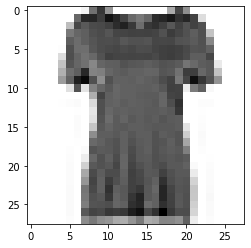

In [32]:
plt.imshow(X_train_full[10], cmap='gray_r')
plt.show()

In [24]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [26]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]

In [27]:
class_names[y_train[0]]

'Coat'

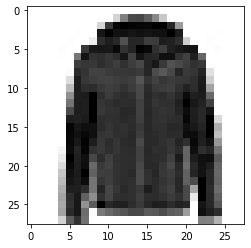

In [30]:
plt.imshow(X_train[0], cmap='gray_r')
plt.show()

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [37]:
# the below model is the same as above
same_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [42]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [43]:
model.get_layer('dense') is hidden1

True

In [49]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04863663,  0.01173522,  0.07113898, ...,  0.02106541,
         0.02629261, -0.06514039],
       [ 0.01154803,  0.05726735, -0.05056894, ...,  0.00699212,
        -0.02887664, -0.03499753],
       [ 0.01394706, -0.03175285,  0.02652083, ...,  0.07216759,
         0.0237656 , -0.02916687],
       ...,
       [ 0.00024964,  0.03812484,  0.0179503 , ..., -0.04651172,
        -0.06905635, -0.06490027],
       [ 0.05930227,  0.02096572, -0.02719131, ..., -0.0540337 ,
         0.04617408,  0.02858833],
       [-0.01038714,  0.04259326,  0.00381252, ...,  0.01348916,
         0.03455678, -0.0054835 ]], dtype=float32)

In [50]:
weights.shape

(784, 300)

In [46]:
biases.shape

(300,)

In [51]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

In [54]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 144us/sample - loss: 0.7416 - accuracy: 0.7605 - val_loss: 0.5016 - val_accuracy: 0.8346
Epoch 2/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.4907 - accuracy: 0.8310 - val_loss: 0.4520 - val_accuracy: 0.8424
Epoch 3/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4445 - accuracy: 0.8433 - val_loss: 0.4330 - val_accuracy: 0.8552
Epoch 4/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4180 - accuracy: 0.8533 - val_loss: 0.4152 - val_accuracy: 0.8566
Epoch 5/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.3983 - accuracy: 0.8598 - val_loss: 0.4101 - val_accuracy: 0.8596
Epoch 6/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3825 - accuracy: 0.8654 - val_loss: 0.3723 - val_accuracy: 0.8728
Epoch 7/30
55000/55000 [==============================] 

In [60]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [59]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5543, 5444, 5496, 5499, 5512, 5507, 5507, 5488, 5510, 5494]))

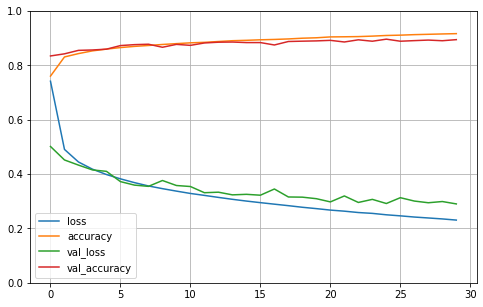

In [67]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [68]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[64.77403972167969, 0.835]

In [69]:
X_new = X_test[:3]

In [70]:
y_proba = model.predict(X_new)

In [71]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [72]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [73]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [74]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
housing = fetch_california_housing()

In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [79]:
model = keras.models.Sequential([
    keras.layers.Dense(
        30,
        activation="relu",
        input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)])

In [80]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 120us/sample - loss: 0.7327 - val_loss: 0.5818
Epoch 2/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4876 - val_loss: 0.4960
Epoch 3/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4523 - val_loss: 0.4703
Epoch 4/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4366 - val_loss: 0.4582
Epoch 5/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4264 - val_loss: 0.4567
Epoch 6/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.4196 - val_loss: 0.4368
Epoch 7/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4122 - val_loss: 0.4350
Epoch 8/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.4089 - val_loss: 0.4360
Epoch 9/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.4044 - val_

In [81]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

### Building Complex Models Using the Functional API

In [9]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [97]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [29]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [30]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [32]:
history = model.fit(
    (X_train_A, X_train_B),
    y_train,
    epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 157us/sample - loss: 2.2309 - val_loss: 0.9251
Epoch 2/20
11610/11610 [==============================] - 1s 107us/sample - loss: 0.7972 - val_loss: 0.7546
Epoch 3/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.7064 - val_loss: 0.6993
Epoch 4/20
11610/11610 [==============================] - 1s 106us/sample - loss: 0.6627 - val_loss: 0.6612
Epoch 5/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.6304 - val_loss: 0.6316
Epoch 6/20
11610/11610 [==============================] - 1s 106us/sample - loss: 0.6049 - val_loss: 0.6064
Epoch 7/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.5835 - val_loss: 0.5859
Epoch 8/20
11610/11610 [==============================] - 1s 107us/sample - loss: 0.5662 - val_loss: 0.5699
Epoch 9/20
11610/11610 [==============================] - 1s 107us/sample - loss: 0.551

In [104]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [105]:
y_pred = model.predict((X_new_A, X_new_B))

In [33]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [34]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [35]:
history = model.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 230us/sample - loss: 1.1874 - main_output_loss: 1.0017 - aux_output_loss: 2.8567 - val_loss: 0.7793 - val_main_output_loss: 0.7051 - val_aux_output_loss: 1.4473
Epoch 2/20
11610/11610 [==============================] - 2s 163us/sample - loss: 0.8907 - main_output_loss: 0.8381 - aux_output_loss: 1.3624 - val_loss: 0.6169 - val_main_output_loss: 0.5495 - val_aux_output_loss: 1.2235
Epoch 3/20
11610/11610 [==============================] - 2s 164us/sample - loss: 0.5841 - main_output_loss: 0.5167 - aux_output_loss: 1.1905 - val_loss: 0.5434 - val_main_output_loss: 0.4817 - val_aux_output_loss: 1.0994
Epoch 4/20
11610/11610 [==============================] - 2s 165us/sample - loss: 0.5285 - main_output_loss: 0.4701 - aux_output_loss: 1.0535 - val_loss: 0.5118 - val_main_output_loss: 0.4577 - val_aux_output_loss: 0.9987
Epoch 5/20
11610/11610 [==============================] - 2s 16

In [110]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [111]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

### Using the Subclassing API to Build Dynamic Models

In [12]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [13]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [14]:
model = WideAndDeepModel()

In [15]:
model((X_train_A, X_train_B))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



(<tf.Tensor: id=86, shape=(11610, 1), dtype=float32, numpy=
 array([[ 0.14803736],
        [-0.11537436],
        [-0.0656997 ],
        ...,
        [-0.02805286],
        [ 0.26220968],
        [ 3.3996415 ]], dtype=float32)>,
 <tf.Tensor: id=112, shape=(11610, 1), dtype=float32, numpy=
 array([[-0.11779682],
        [-0.08826073],
        [ 0.02316739],
        ...,
        [-0.07743595],
        [-0.03797254],
        [ 0.25223577]], dtype=float32)>)

In [18]:
model.summary()

Model: "wide_and_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  210       
_________________________________________________________________
dense_1 (Dense)              multiple                  930       
_________________________________________________________________
dense_2 (Dense)              multiple                  36        
_________________________________________________________________
dense_3 (Dense)              multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [20]:
history = model.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 229us/sample - loss: 0.8486 - output_1_loss: 0.7427 - output_2_loss: 1.7997 - val_loss: 0.6082 - val_output_1_loss: 0.5385 - val_output_2_loss: 1.2358
Epoch 2/20
11610/11610 [==============================] - 2s 150us/sample - loss: 0.5622 - output_1_loss: 0.5065 - output_2_loss: 1.0626 - val_loss: 0.5341 - val_output_1_loss: 0.4840 - val_output_2_loss: 0.9861
Epoch 3/20
11610/11610 [==============================] - 2s 152us/sample - loss: 0.4961 - output_1_loss: 0.4527 - output_2_loss: 0.8852 - val_loss: 0.5262 - val_output_1_loss: 0.4877 - val_output_2_loss: 0.8734
Epoch 4/20
11610/11610 [==============================] - 2s 152us/sample - loss: 0.4754 - output_1_loss: 0.4418 - output_2_loss: 0.7782 - val_loss: 0.5062 - val_output_1_loss: 0.4772 - val_output_2_loss: 0.7675
Epoch 5/20
11610/11610 [==============================] - 2s 151us/sample - loss: 0.4572 - output_1_los

In [21]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [23]:
print(total_loss, main_loss, aux_loss)

0.3714709172184153 0.35783514 0.4843397


In [24]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [26]:
model.save_weights("my_keras_submodel.h5")

### Saving and Restoring a Model

In [27]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(
    (X_train_A, X_train_B),
    y_train,
    epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 144us/sample - loss: 1.7571 - val_loss: 0.9095
Epoch 2/20
11610/11610 [==============================] - 1s 100us/sample - loss: 0.7972 - val_loss: 0.7642
Epoch 3/20
11610/11610 [==============================] - 1s 101us/sample - loss: 0.6992 - val_loss: 0.7026
Epoch 4/20
11610/11610 [==============================] - 1s 101us/sample - loss: 0.6506 - val_loss: 0.6603
Epoch 5/20
11610/11610 [==============================] - 1s 102us/sample - loss: 0.6160 - val_loss: 0.6301
Epoch 6/20
11610/11610 [==============================] - 1s 101us/sample - loss: 0.5895 - val_loss: 0.6053
Epoch 7/20
11610/11610 [==============================] - 1s 101us/sample - loss: 0.5684 - val_loss: 0.5841
Epoch 8/20
11610/11610 [==============================] - 1s 101us/sample - loss: 0.5519 - val_loss: 0.5707
Epoch 9/20
11610/11610 [==============================] - 1s 102us/sample - loss: 0.539

In [28]:
model.save("my_keras_model.h5")

In [29]:
model = keras.models.load_model("my_keras_model.h5")

### Using Callbacks

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(
        30,
        activation="relu",
        input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)])

model.compile(loss="mean_squared_error", optimizer="sgd")

In [33]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Train on 11610 samples
Epoch 1/10
11610/11610 [==============================] - 1s 107us/sample - loss: 0.8951
Epoch 2/10
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5661
Epoch 3/10
11610/11610 [==============================] - 1s 78us/sample - loss: 0.4610
Epoch 4/10
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4385
Epoch 5/10
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4226
Epoch 6/10
11610/11610 [==============================] - 1s 76us/sample - loss: 0.41080s - loss: 0.438 - ETA: 0s 
Epoch 7/10
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4006
Epoch 8/10
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3926
Epoch 9/10
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3869
Epoch 10/10
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3859


In [34]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_keras_model.h5",
    save_best_only=True)

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # roll back to best model

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 99us/sample - loss: 0.3784 - val_loss: 0.3941
Epoch 2/10
11610/11610 [==============================] - 1s 97us/sample - loss: 0.3773 - val_loss: 0.3811
Epoch 3/10
11610/11610 [==============================] - 1s 93us/sample - loss: 0.3724 - val_loss: 0.3877
Epoch 4/10
11610/11610 [==============================] - 1s 92us/sample - loss: 0.3707 - val_loss: 0.3859
Epoch 5/10
11610/11610 [==============================] - 1s 92us/sample - loss: 0.3684 - val_loss: 0.3831
Epoch 6/10
11610/11610 [==============================] - 1s 93us/sample - loss: 0.3659 - val_loss: 0.3765
Epoch 7/10
11610/11610 [==============================] - 1s 92us/sample - loss: 0.3672 - val_loss: 0.3920
Epoch 8/10
11610/11610 [==============================] - 1s 93us/sample - loss: 0.3829 - val_loss: 0.3756
Epoch 9/10
11610/11610 [==============================] - 1s 93us/sample - loss: 0.3637 - val_l

In [35]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 110us/sample - loss: 0.3571 - val_loss: 0.3720
Epoch 2/100
11610/11610 [==============================] - 1s 93us/sample - loss: 0.3754 - val_loss: 0.8836
Epoch 3/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.3626 - val_loss: 0.3669
Epoch 4/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.3559 - val_loss: 0.5425
Epoch 5/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.3657 - val_loss: 2.5335
Epoch 6/100
11610/11610 [==============================] - 1s 94us/sample - loss: 0.3784 - val_loss: 0.3676
Epoch 7/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.3529 - val_loss: 0.3716
Epoch 8/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.3496 - val_loss: 0.3702
Epoch 9/100
11610/11610 [==============================] - 1s 93us/sample - loss: 0.34

### Using TensorBoard for Visualization

In [10]:
from pathlib import Path

In [11]:
root_logdir = Path.cwd().joinpath("my_logs")

In [12]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return root_logdir.joinpath(run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [45]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 172us/sample - loss: 0.3431 - val_loss: 0.3392
Epoch 2/30
11610/11610 [==============================] - 1s 100us/sample - loss: 0.3273 - val_loss: 0.3434
Epoch 3/30
11610/11610 [==============================] - 1s 101us/sample - loss: 0.3250 - val_loss: 0.3400
Epoch 4/30
11610/11610 [==============================] - 1s 105us/sample - loss: 0.3279 - val_loss: 0.3407
Epoch 5/30
11610/11610 [==============================] - 1s 100us/sample - loss: 0.3254 - val_loss: 0.3466
Epoch 6/30
11610/11610 [==============================] - 1s 104us/sample - loss: 0.3341 - val_loss: 0.3839
Epoch 7/30
11610/11610 [==============================] - 1s 100us/sample - loss: 0.3244 - val_loss: 0.3400
Epoch 8/30
11610/11610 [==============================] - 1s 101us/sample - loss: 0.3232 - val_loss: 0.3400
Epoch 9/30
11610/11610 [==============================] - 1s 104us/sample - loss: 0.321

In [21]:
str(test_logdir)

'/home/sejinnam/Documents/Handson/my_logs/run_2021_03_29-23_54_31'

In [22]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))

In [24]:
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

### Fine-Tuning Neural Network Hyperparameters

In [32]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [25]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [26]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [27]:
keras_reg.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 201us/sample - loss: 1.1139 - val_loss: 0.6030
Epoch 2/100
11610/11610 [==============================] - 1s 91us/sample - loss: 0.5666 - val_loss: 0.6645
Epoch 3/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.5186 - val_loss: 0.5710
Epoch 4/100
11610/11610 [==============================] - 1s 91us/sample - loss: 0.4894 - val_loss: 0.4717
Epoch 5/100
11610/11610 [==============================] - 1s 95us/sample - loss: 0.4700 - val_loss: 0.4537
Epoch 6/100
11610/11610 [==============================] - 1s 91us/sample - loss: 0.4580 - val_loss: 0.4514
Epoch 7/100
11610/11610 [==============================] - 1s 91us/sample - loss: 0.4482 - val_loss: 0.4332
Epoch 8/100
11610/11610 [==============================] - 1s 91us/sample - loss: 0.4402 - val_loss: 0.4306
Epoch 9/100
11610/11610 [==============================] - 1s 93us/sample - loss: 0.43

In [28]:
mse_test = keras_reg.score(X_test, y_test)
print(mse_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [30]:
y_pred = keras_reg.predict(X_test)

In [34]:
reciprocal(3e-4, 3e-2)

In [36]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),}

In [37]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

In [ ]:
rnd_search_cv.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 166us/sample - loss: 1.3565 - val_loss: 1.3300
Epoch 2/100
7740/7740 [==============================] - 1s 104us/sample - loss: 1.0374 - val_loss: 1.3868
Epoch 3/100
7740/7740 [==============================] - 1s 105us/sample - loss: 0.8556 - val_loss: 0.5926
Epoch 4/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.5709 - val_loss: 0.5183
Epoch 5/100
7740/7740 [==============================] - 1s 106us/sample - loss: 0.5155 - val_loss: 0.4821
Epoch 6/100
7740/7740 [==============================] - 1s 104us/sample - loss: 0.4841 - val_loss: 0.4597
Epoch 7/100
7740/7740 [==============================] - 1s 104us/sample - loss: 0.4603 - val_loss: 0.4395
Epoch 8/100
7740/7740 [==============================] - 1s 105us/sample - loss: 0.4438 - val_loss: 0.4331
Epoch 9/100
7740/7740 [==============================] - 1s 104us/sample - loss: 0.4307 - val_lo